# Breast Cancer Prediction
Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area. The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign (non cancerous).

In [152]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Splitting Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing

# Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn import tree


#### Dataset Details

In [153]:
#importing data
data = pd.read_csv("breast-cancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [154]:
#size of dataset
data.shape

(569, 32)

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [156]:
#summarizing data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


#### Clean and Prepare The Data

In [157]:
#check presence of null values
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

there are no missing values in the dataset


In [158]:
#dropping unnecessary column
data = data.drop('id', 1)
data.head()

C:\Users\Mariam\AppData\Local\Temp\ipykernel_20056\3629299610.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('id', 1)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [159]:
#remove duplicate rows
data = data.drop_duplicates()
data.shape

(569, 31)

there are no duplicates

<AxesSubplot:>

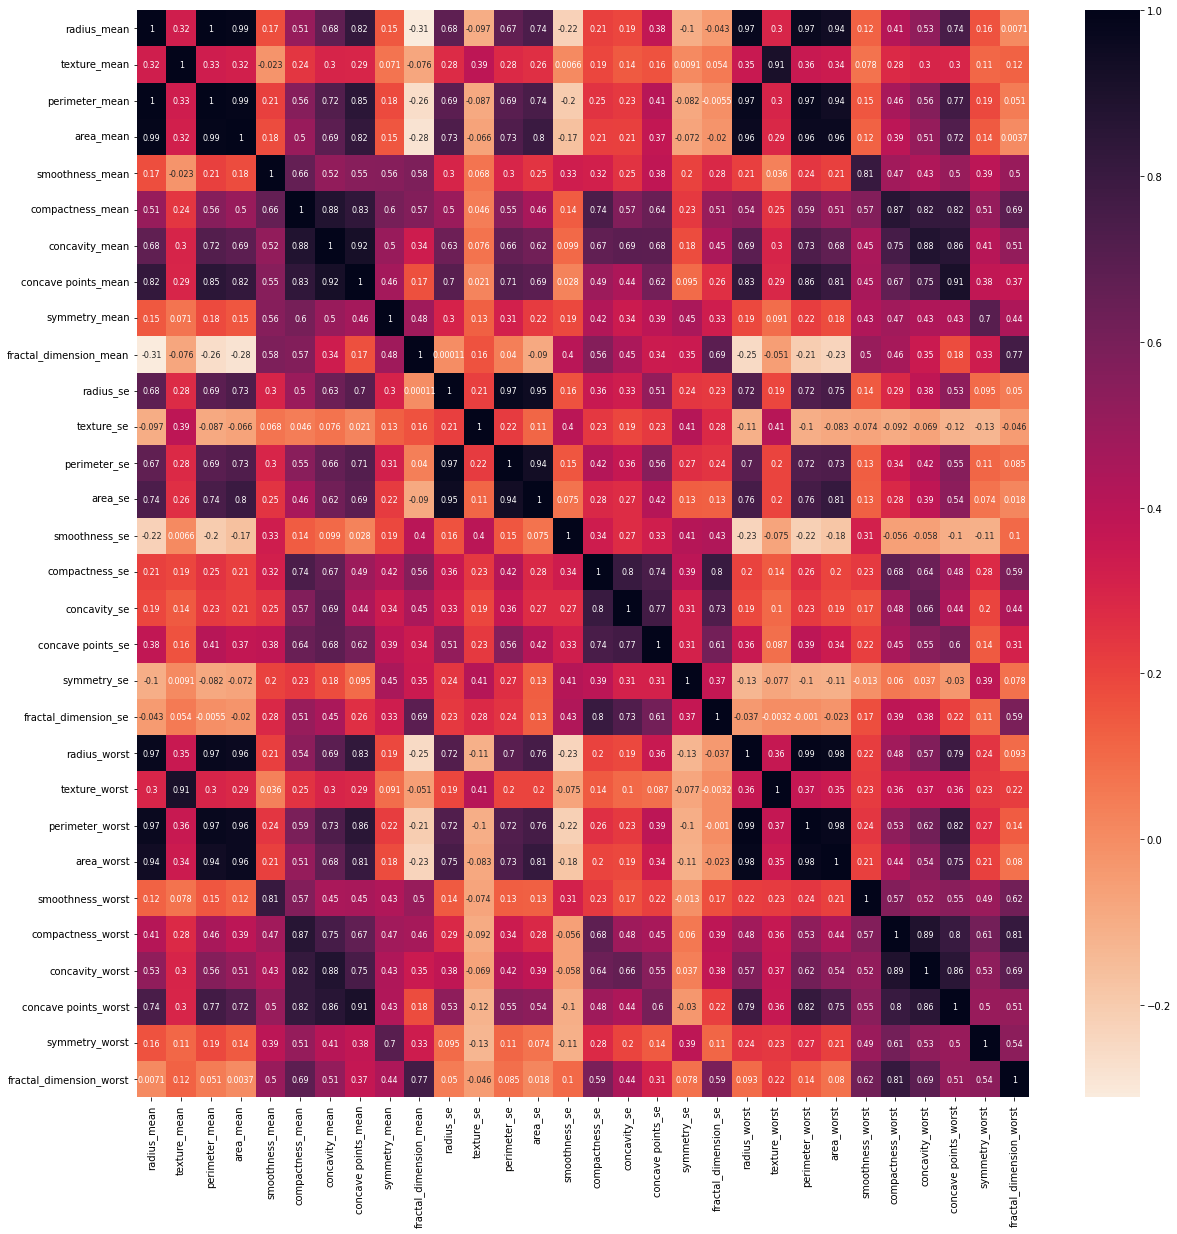

In [160]:
#finding the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),cmap="rocket_r" , annot=True,annot_kws= {"size": 8})


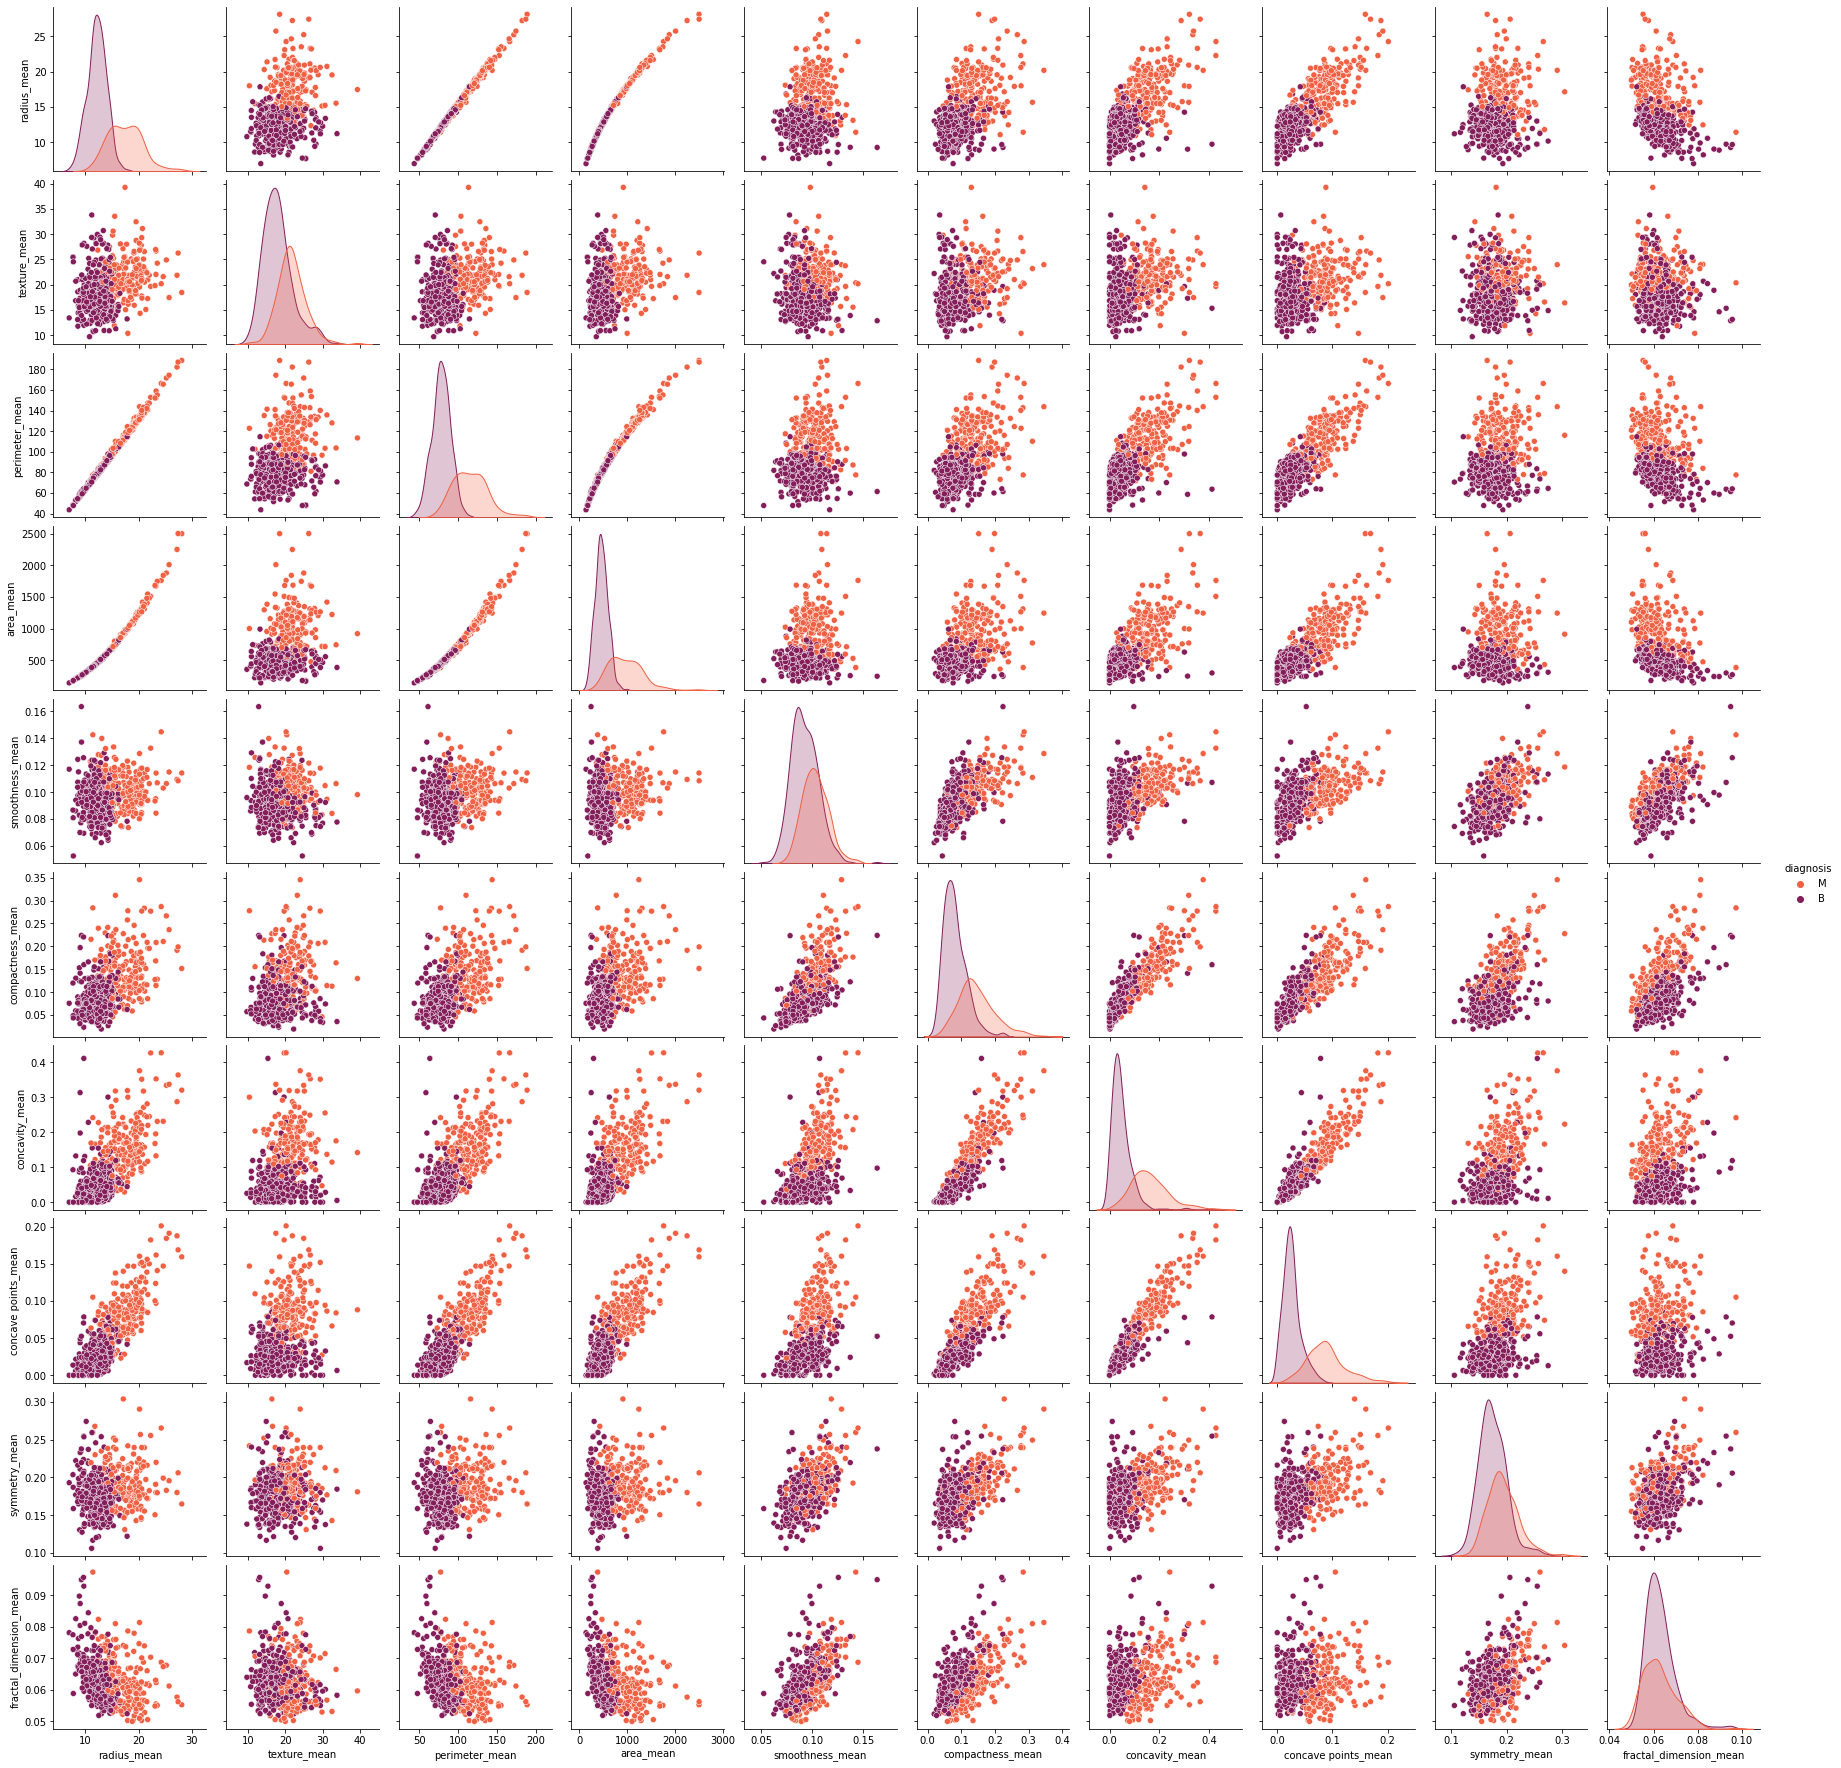

In [161]:
# generate a scatter plot matrix with the "mean" columns
cols = ['diagnosis',
        'radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']

sns.pairplot(data[cols], hue='diagnosis', palette='rocket_r')

In [162]:
#map diagnosis as binary attribute
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


C:\Users\Mariam\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

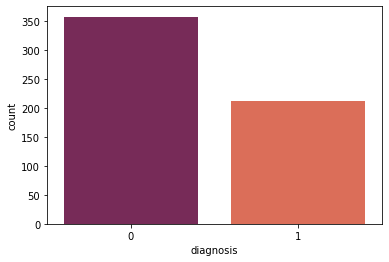

In [163]:
#count malignent and bengin
data['diagnosis'].value_counts()
#plot for count of malignant and bengin
sns.countplot(data['diagnosis'], palette='rocket')

Data is imbalanced

In [164]:
#balance data
X = data.drop('diagnosis', axis = 1)
y = data['diagnosis']
robust = RobustScaler()
X_scaled = robust.fit_transform(X)

In [165]:
#normalizing data
preprocessing.normalize(data.loc[:, data.columns != 'diagnosis'])

array([[7.92541486e-03, 4.57286305e-03, 5.40989964e-02, ...,
        1.16920795e-04, 2.02695018e-04, 5.23808686e-05],
       [8.66575595e-03, 7.48616836e-03, 5.59882822e-02, ...,
        7.83583182e-05, 1.15852352e-04, 3.75024596e-05],
       [9.36668268e-03, 1.01087865e-02, 6.18419883e-02, ...,
        1.15596947e-04, 1.71873157e-04, 4.16624718e-05],
       ...,
       [1.16438847e-02, 1.96964025e-02, 7.59658259e-02, ...,
        9.94640269e-05, 1.55579134e-04, 5.48525170e-05],
       [9.23020523e-03, 1.31418408e-02, 6.27743569e-02, ...,
        1.18738077e-04, 1.83125480e-04, 5.55604587e-05],
       [2.31098880e-02, 7.30820427e-02, 1.42709515e-01, ...,
        0.00000000e+00, 8.55006294e-04, 2.09626935e-04]])

As one can notice, there are some column containing values as ‘0’, but not any ‘NA’ or ‘INF’ values, this data is clean enough to proceed with further processing


array([[<AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>,
        <AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>],
       [<AxesSubplot:title={'center':'compactness_mean'}>,
        <AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>,
        <AxesSubplot:title={'center':'fractal_dimension_mean'}>],
       [<AxesSubplot:title={'center':'radius_se'}>,
        <AxesSubplot:title={'center':'texture_se'}>,
        <AxesSubplot:title={'center':'perimeter_se'}>,
        <AxesSubplot:title={'center':'area_se'}>,
        <AxesSubplot:title={'center':'smoothness_se'}>],
       [<AxesSubplot:title={'center':'compactness_se'}>,
        <AxesSubplot:title={'center':'concavity_se'}>,
        <AxesSubplot:title={'center':'concav

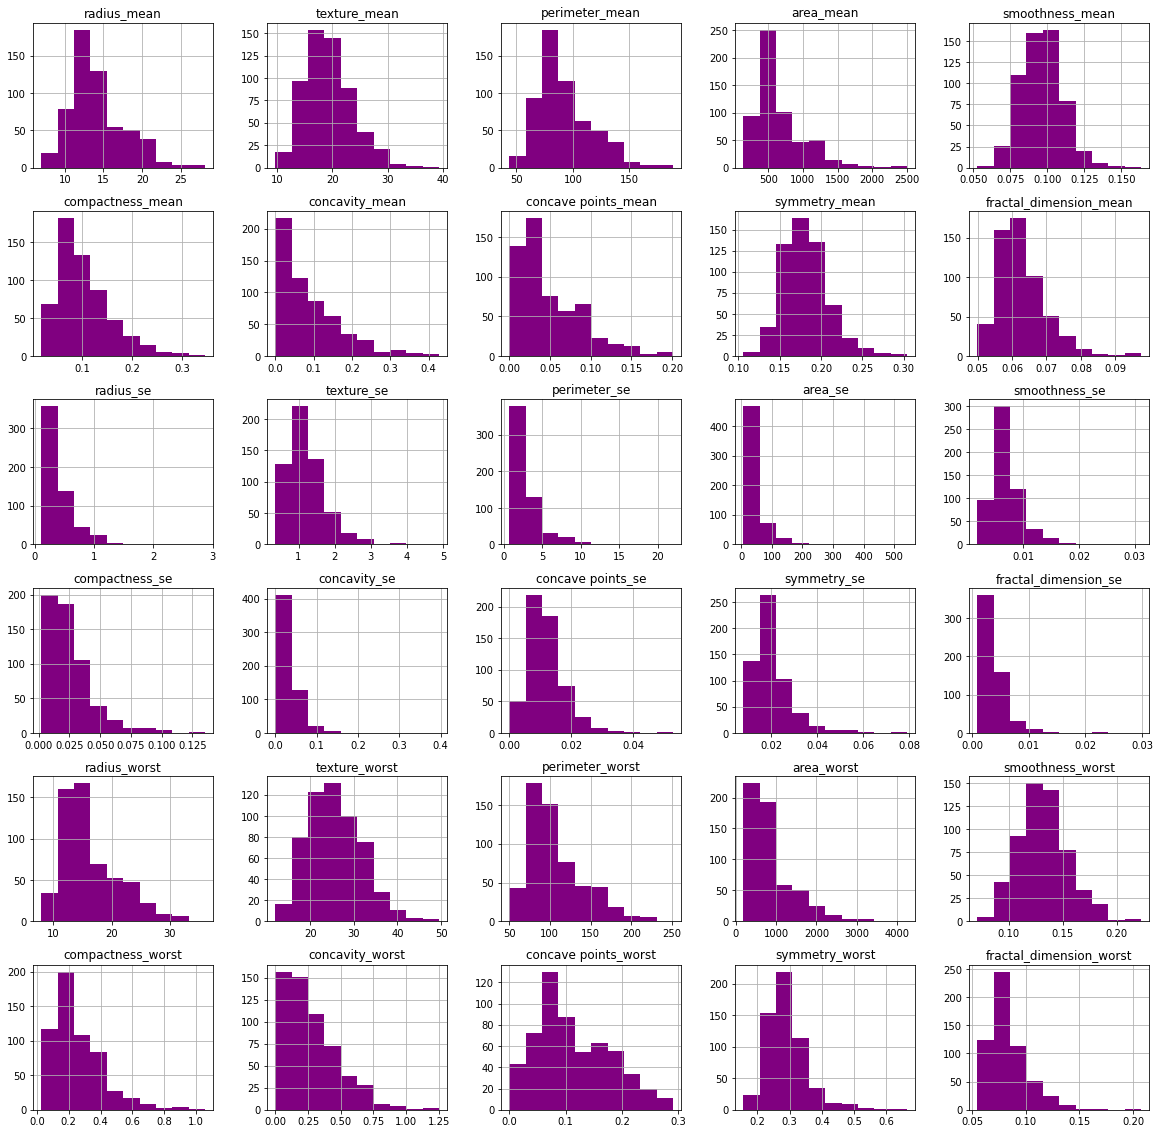

In [166]:
X.hist(figsize=(20,20),color= "purple")

#### Splitting DataFrame

In [167]:
#splitting by stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                   stratify = y,
                                                    test_size = 0.2,
                                                   random_state = 3030)

## KNN Classification

In [168]:
#importing libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics


In [169]:
#Apply KNN
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)
knnres =neigh.predict(X_test)
print (knnres)

[0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0
 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1
 0 0 0]


In [180]:
#Calculate accuracy 
knnaccuracy = accuracy_score(y_test, knnres)
print (knnaccuracy*100,"%")

97.36842105263158 %


## Bayesian Classification

In [171]:
gnb = GaussianNB()
gnbres = gnb.fit(X_train, y_train).predict(X_test)
print (gnbres)
print(y_test)

[0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0
 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1
 0 0 0]
152    0
130    0
55     0
91     1
45     1
      ..
555    0
83     1
135    1
507    0
336    0
Name: diagnosis, Length: 114, dtype: int64


In [179]:
gnbaccuracy = accuracy_score(y_test , gnbres)
print (gnbaccuracy*100,"%")


94.73684210526315 %


## Decision Tree

In [173]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [174]:
#applying descision tree
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)


In [175]:
#Predicting test
clfres =clf.predict(X_test)
print (clfres)


[0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0
 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1
 0 0 0]


In [178]:
#calculating accuracy
clfaccuracy = accuracy_score(y_test, clfres)
print (clfaccuracy*100,"%")

94.73684210526315 %


[Text(0.655, 0.9375, 'X[7] <= 0.34\ngini = 0.468\nsamples = 455\nvalue = [285, 170]'), Text(0.45, 0.8125, 'X[20] <= 0.322\ngini = 0.095\nsamples = 279\nvalue = [265, 14]'), Text(0.34, 0.6875, 'X[24] <= 1.577\ngini = 0.037\nsamples = 262\nvalue = [257, 5]'), Text(0.3, 0.5625, 'X[7] <= 0.293\ngini = 0.03\nsamples = 261\nvalue = [257, 4]'), Text(0.2, 0.4375, 'X[13] <= 0.884\ngini = 0.016\nsamples = 256\nvalue = [254, 2]'), Text(0.12, 0.3125, 'X[14] <= -1.037\ngini = 0.008\nsamples = 254\nvalue = [253, 1]'), Text(0.08, 0.1875, 'X[27] <= 0.011\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'), Text(0.04, 0.0625, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'), Text(0.12, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'), Text(0.16, 0.1875, 'gini = 0.0\nsamples = 247\nvalue = [247, 0]'), Text(0.28, 0.3125, 'X[29] <= -0.539\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'), Text(0.24, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'), Text(0.32, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'), Text(0.4, 

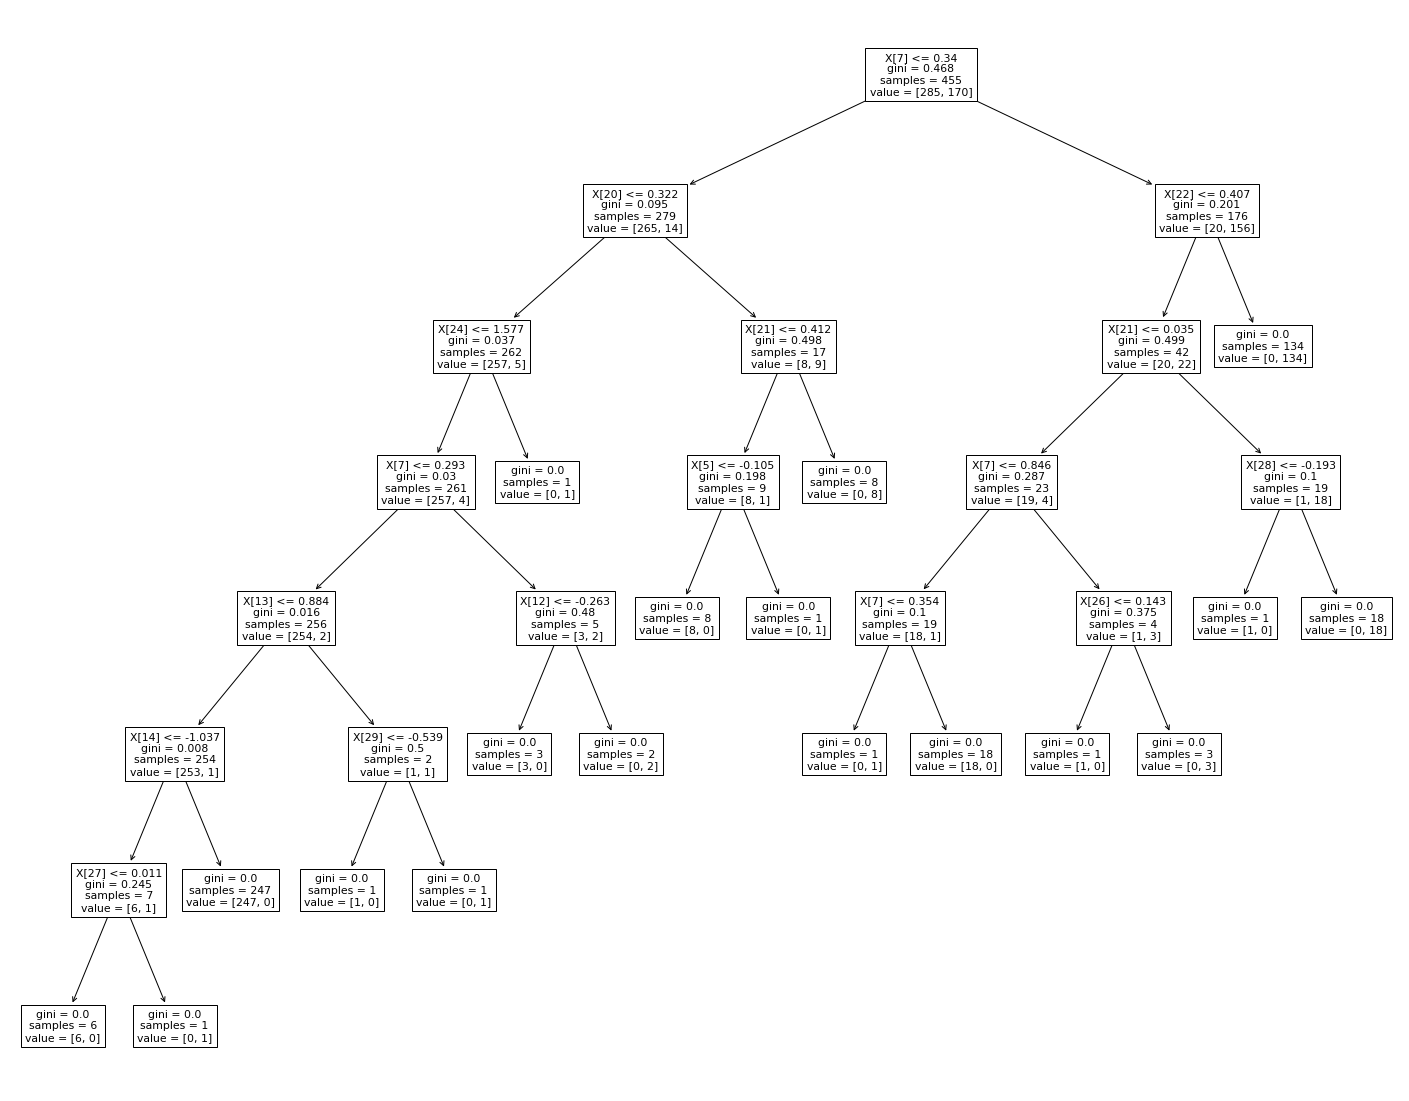

In [177]:
#tree visualization
fig = plt.figure(figsize=(25,20))
print (plot_tree(clf))